In [12]:
from shared import *
purchases_df = get_wearable_purchases_df()
wearable_types_df = get_wearable_types_df()
purchases_types_df = get_wearables_purchases_types_df(wearable_types_df, purchases_df)

In [16]:
column_name_mappings = {'name': 'Wearable', 'quantity': 'Total Volume (Units)', 'totalPrice': 'Total Volume (GHST)', 'rarity': 'Rarity', 'slotNames': 'Slot(s)', 'datePurchased': 'Date', 'startOfWeekPurchased': 'Week', 'yearMonthPurchased': 'Month'}
metrics = [column_name_mappings['quantity'], column_name_mappings['totalPrice']]

def get_volume_by_column(column_name):
    return purchases_types_df.pivot_table(index=column_name,values=['quantity', 'totalPrice'],aggfunc=np.sum,margins=False).reset_index().rename(columns=column_name_mappings)

## Wearable Sales Volume
### Total Volume

In [17]:
total_volume_df = pd.DataFrame([[purchases_types_df['quantity'].sum(), purchases_types_df['totalPrice'].sum()]], columns=['Total Volume (Units)', 'Total Volume (GHST)'])
show_itable(total_volume_df)

### Volume Over Time
Incomplete weeks / months are ommitted.

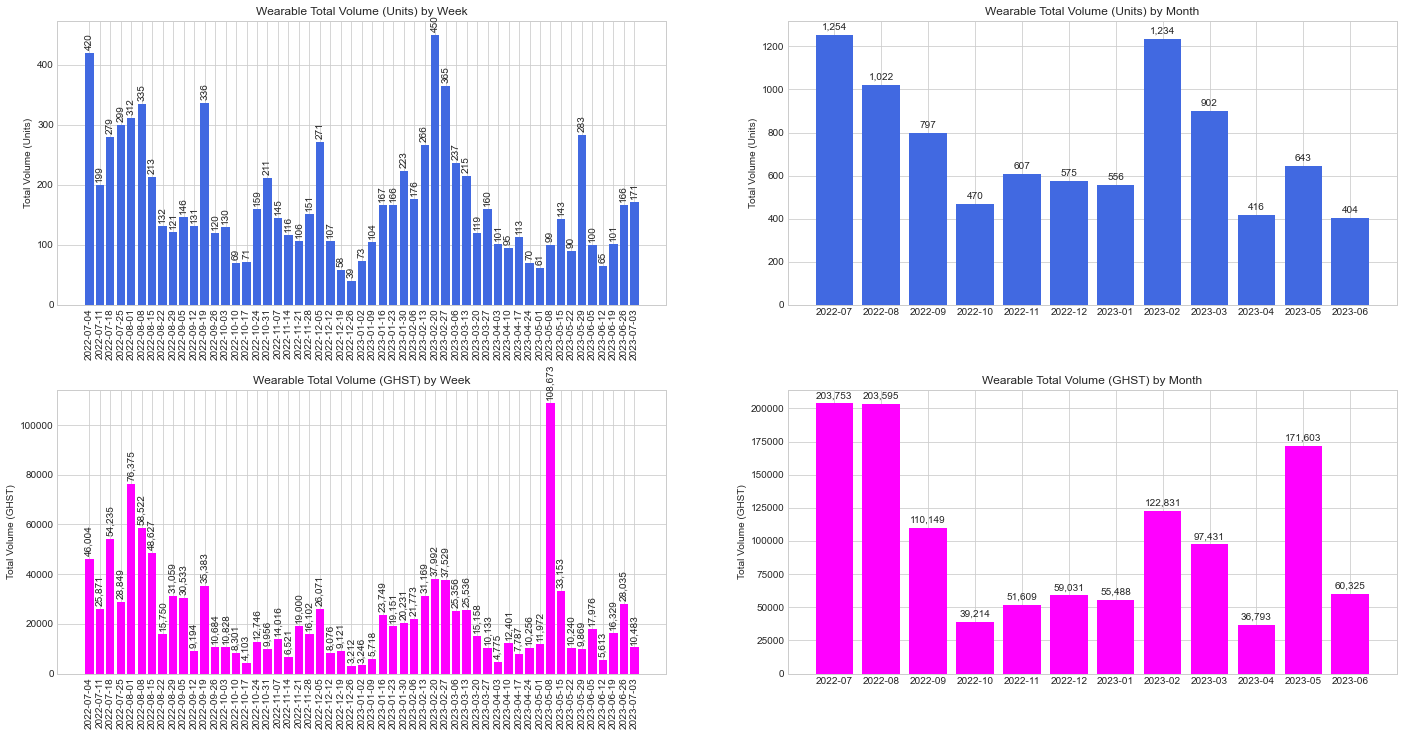

In [18]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(24,12)
fig.subplots_adjust(hspace=0.3)
# titles
by_week_df = get_volume_by_column('startOfWeekPurchased')
by_month_df = get_volume_by_column('yearMonthPurchased')
dfs = [by_week_df.iloc[1:-1], by_month_df[:-1]]
x_cols = ['startOfWeekPurchased', 'yearMonthPurchased']
y_cols = ['quantity', 'totalPrice']
colors = ['royalBlue', 'magenta']

for row in [0,1]:
    for col in [0,1]:
        xcol = column_name_mappings[x_cols[col]]
        ycol = column_name_mappings[y_cols[row]]
        df = dfs[col]
        ax[row][col].set_title("Wearable {metric} by {interval}".format(metric=ycol, interval=xcol))
        ax[row][col].set_ylabel(ycol)
        ax[row][col].ticklabel_format(style="plain")
        plt.setp(ax[row][col].xaxis.get_majorticklabels(), rotation=-90 * (col - 1))
        bars = ax[row][col].bar(df[xcol], df[ycol], tick_label=df[xcol], color=colors[row])
        for b in bars:
            height = b.get_height()
            ax[row][col].annotate('{:,.0f}'.format(height),
                rotation= (col - 1) * -90,
                xy=(b.get_x() + b.get_width() / 2, height),
                xytext=(0, 3), # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')     

### Volume by Wearable

In [23]:
by_name_df = get_volume_by_column('name')
show_itable_long(by_name_df, order=[[2, 'desc']])

### Volume by Slot

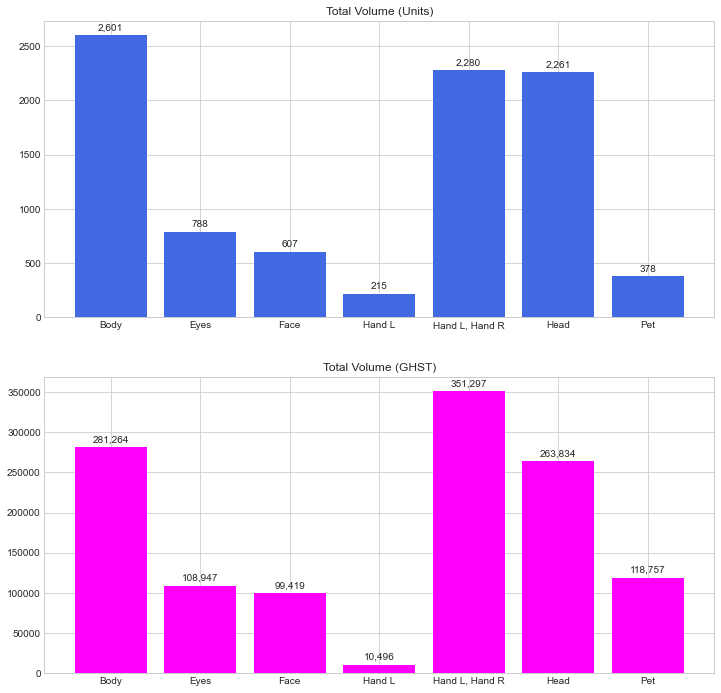

In [20]:
by_slot_df = get_volume_by_column('slotNames')
fig, ax = get_bar_charts(by_slot_df, column_name_mappings['slotNames'], metrics, colors)

### Volume by Rarity

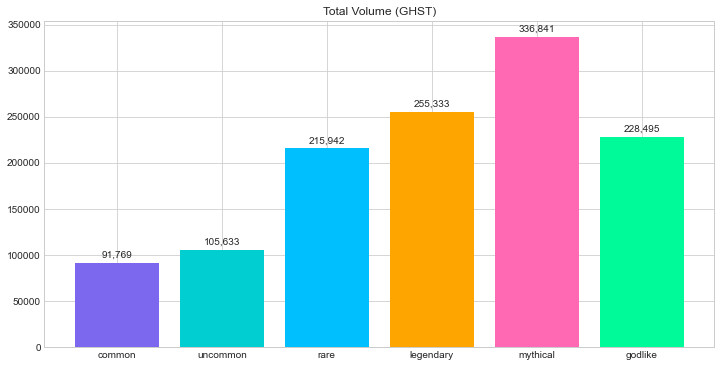

In [21]:
by_rarity_df = get_volume_by_column('rarity')
sorted_by_rarity_df = by_rarity_df.sort_values(column_name_mappings['quantity'], ascending=False)
rarity_colors = list(map(get_rarity_color, sorted_by_rarity_df[column_name_mappings['rarity']].to_list()))
fig, ax = get_bar_charts(sorted_by_rarity_df, column_name_mappings['rarity'], metrics[1:], [rarity_colors])